<a href="https://colab.research.google.com/github/Garvit-Kr/Deep_L/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
algo orignal gradient descent

initialize random guess of minimum
loop over training iteration
        compute derivative at guess min
        updated guess min is itself minus derivative scaled by learing rate

_____________________________________________________________
problem with gradient descent
**can get stuck in local minima(as the model inc. from 2-dimension it becomes hard)

'''

In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives


import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')   #it draws figure in vector format rather than pixel format

Gradient Descent in 1D

In [ ]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

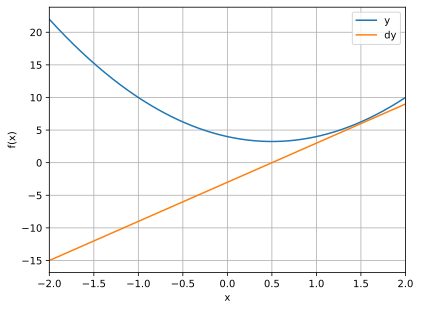

In [ ]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)      #start,stop,intervals for ploting

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [ ]:
# random starting point
localmin = np.random.choice(x,1)    #random starting point for linspace we created((can be anything))
print(localmin)

# learning parameters       (should have good no. of both to reach optimal sol.)
learning_rate = .01          #LEARNING_RATE PARAMETERS (point we move for with iteration 0.1(above) or +++)
training_epochs = 100        #LEARNING_RATE PARAMETERS(sort of iteration)

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)              #then local minima wil  always be almost same minor diff
  localmin = localmin - learning_rate*grad

localmin

[-0.76]


array([0.49741086])

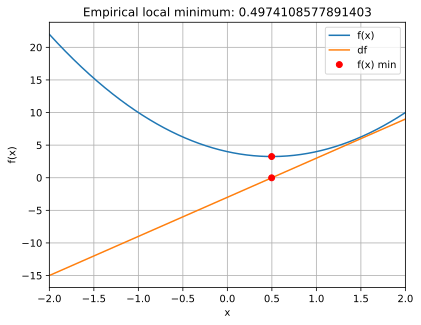

In [ ]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

In [ ]:
#store the model parameter and output in each iteration

# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad


<ipython-input-6-09a42e0b5e72>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,0] = localmin
<ipython-input-6-09a42e0b5e72>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,1] = grad


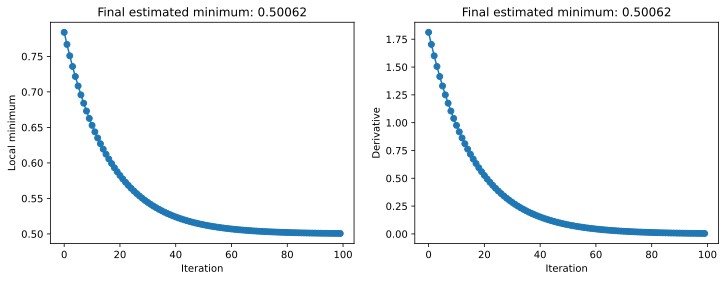

In [ ]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [ ]:
''' ADDITIONAL  QUESTIONS
1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than
    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative
    instead of a specified number of training epochs?
'''

GRADIENT  DECENT IN 2D

In [ ]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)          #z=(function)(while will be solved by gradient)(nebula∇=(∂ x f ,∂ y f,....∂ z f))(∂:del(partial dervative))

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

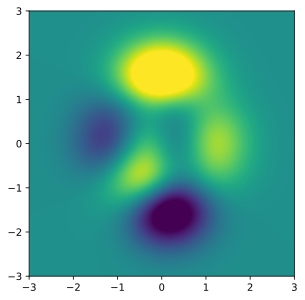

In [ ]:
# create the landscape       #all variables seperately
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [ ]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [ ]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666835]
[-0.24948138  0.35295347]


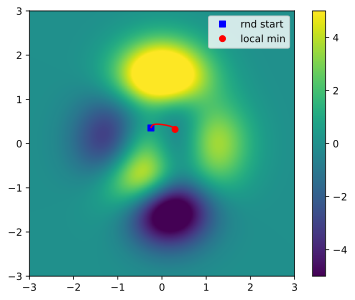

In [ ]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

In [ ]:
''' ADDITIONAL QUESTIONS
1)Modify the code to force the initial guess to be [0,1.4]. Does the model reach a reasonable local minimum?

2) Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from
    using 1000 epochs?

3) (Again with the same starting location) Change the learning to .1 (1000 epochs). What do you notice about the trajectory?
    Try again with the learning rate set to .5, and then to .00001.
'''

Experiments on G.D.

1.experiment to understand GD

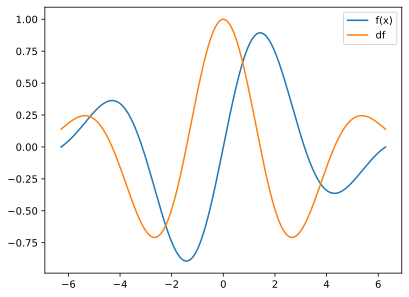

In [ ]:
# the function
x  = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

# quick plot for inspection
plt.plot(x,fx, x,df)
plt.legend(['f(x)','df']);

In [ ]:
# function (note: over-writing variable names!)
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

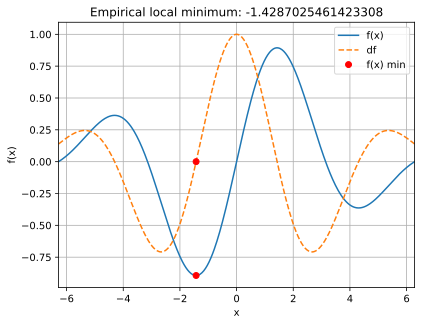

In [ ]:
# random starting point
localmin = np.random.choice(x,1)#np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad



# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


2.running prameter experiment

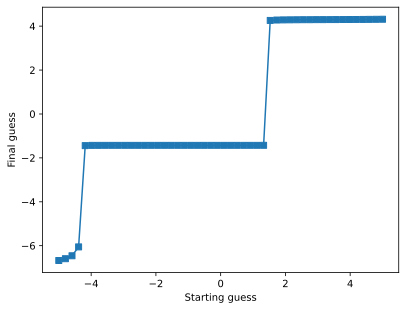

In [ ]:
# Experiment 1: systematically varying the starting locations
#________________________________________________________________
startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx,localmin in enumerate(startlocs):

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # store the final guess
  finalres[idx] = localmin


# plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

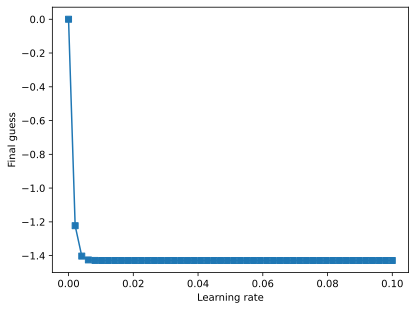

In [ ]:
# Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx,learningRate in enumerate(learningrates):

  # force starting guess to 0
  localmin = 0

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad

  # store the final guess
  finalres[idx] = localmin


plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [ ]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):

    # run through training (again fixing starting location)
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad

    # store the final guess
    finalres[Lidx,Eidx] = localmin


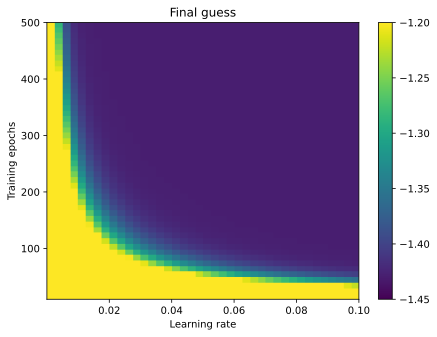

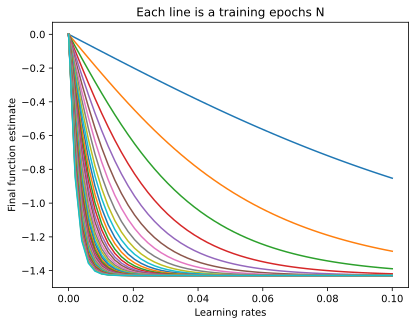

In [ ]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()